# Extract, Transform, Load (ETL)

***

This is a very simple notebook where data is read from some csv files which are stored in a dataframe. Then, an unused column is dropped, duplicate and NaN rows are deleted along with rows of cancelled flights (these are basically NaN rows and we won't be using them in the analysis), a sample of the data set is randomly taken, and default column names are changed for the ease of typing. Finally, methods to export/read the data frame to/from HDF5 are defined.

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# functions definition

def csvToDf(all_files): # read csv files and store into dataframe
    df_from_each_file = (pd.read_csv(file) for file in all_files) # read files
    concatenated_df = pd.concat(df_from_each_file) # concatenate all 12 dataframes
    return concatenated_df

def dropUnnamedCol(df): # drop undesired column
    df_aux = df.drop(df.filter(regex='Unname'), axis=1)
    return df_aux

def deleteDuplicatesAndNan(df):
    df_aux1 = df.drop_duplicates() # delete all duplicates
    df_aux2 = df_aux1.dropna(axis=0, how='all') # delete NaN rows
    df_clean = df_aux2.drop(df_aux2[df_aux2['CANCELLED'] == 1].index) # delete cancelled flights
    return df_clean

def dfToSample(df, size): # use a random sample of data for faster computations
    sample = df.sample(frac = size)
    return sample

def changeColumnLabels(df):
    new_column_names = ['year','month','day-of-month','day-of-week','date','origin', 
                    'destination','departure-time','departure-delay','taxi-out','taxi-in', 
                    'arrival-time','arrival-delay','cancelled','actual-elapsed-time',
                    'air-time','distance','carrier-delay','weather-delay',
                    'nas-delay','security-delay','late-aircraft-delay']
    df.columns = new_column_names
    return df

def toHdf5(df, path): # export the pandas data frame into HDF5
    df.to_hdf(path + 'h5File.h5', key='df', mode='w')
    
def readHdf5(path):  # use pandas to read data from the hdf5 file
    df = pd.read_hdf(path + 'h5File.h5', 'df')
    return df

In [3]:
path = '../'
all_files = glob.iglob(os.path.join(path, '*.csv')) # gather all 12 csv files, one per month
concatenated_df = csvToDf(all_files)
df_drop = dropUnnamedCol(concatenated_df)
df_clean = deleteDuplicatesAndNan(df_drop)
sample_df = dfToSample(df_clean, 0.025)
df = changeColumnLabels(sample_df)
toHdf5(df, path) # store the transformed data frame
df = readHdf5(path) # check that the data frame can be read

Total number of entries (non-cancelled flights) in the data frame: 158599


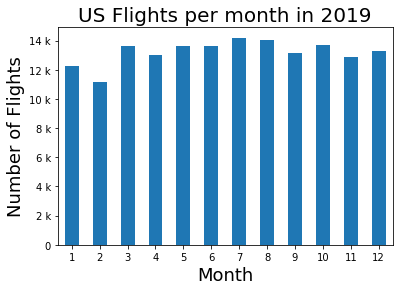

In [5]:
ax = df.groupby(by = 'month')['year'].count().plot(kind='bar')
plt.title('US Flights per month in 2019', fontsize=20)
plt.ylabel('Number of Flights', fontsize=18)
plt.xlabel('Month', fontsize=18)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 0)
print('Total number of entries (non-cancelled flights) in the data frame: ' + str(len(df.index)))